# Auto-encoders and Generative models in `keras`

In this session, you will experiment with auto-encoders and then a family of generative models called 
Generative Adversarial Models (GANs).

## Auto-encoders

**Question 1.** Implement a shallow auto-encoder (with a single layer from the input to the hidden 
representation in dimension 16, and a single layer from this hidden representation to the output) and 
fit it to MNIST training set.



In [ ]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, InputLayer
from keras.models import Sequential


(X_train, _), (X_test, _) = mnist.load_data()
# Represent images as long vectors of pixels in [0, 1]
X_train = X_train.reshape((X_train.shape[0], -1)) / 255.
X_train = X_train[::2]  # Keep half of the dataset
X_test = X_test.reshape((X_test.shape[0], -1)) / 255.
X_test = X_test[::2]  # Keep half of the dataset

Using TensorFlow backend


2023-12-15 16:38:29.813122: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-12-15 16:38:29.813141: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-15 16:38:29.813149: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-15 16:38:29.813217: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-15 16:38:29.813397: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2023-12-15 16:38:30.678395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 4ms/step - loss: 0.0540
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0362
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0331
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0308
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0299
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0296
Epoch 7/10
235/235 [==============================] - 1s 3ms/step - loss: 0.0294
Epoch 8/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0293
Epoch 9/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0293
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0292


In [ ]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], )),
    Dense(units=16, activation="relu"),
    Dense(units=X_train.shape[1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, X_train, epochs=10, batch_size=128)

**Question 2.** Use the code below to visualize the quality of reconstruction on some test samples.

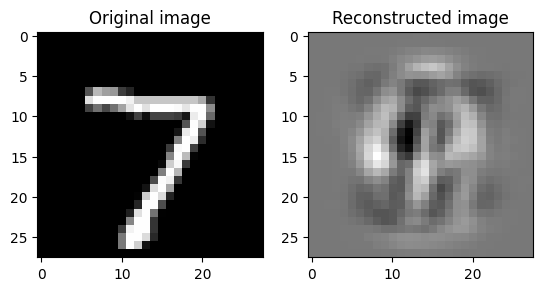

In [ ]:
import matplotlib.pyplot as plt

def plot_reconstruction(img, reconstruction):
    plt.figure()
    plt.subplot(1, 2, 1)
    plt.imshow(img.reshape((28, 28)), cmap="gray")
    plt.title("Original image")
    plt.subplot(1, 2, 2)
    plt.imshow(reconstruction.reshape((28, 28)), cmap="gray")
    plt.title("Reconstructed image")

preds = model.predict(X_test)
plot_reconstruction(X_test[0], preds[0])


**Question 3.** Check if adding more layers (in both the encoder and decoder, trying to keep a mirror 
structure) helps better reconstructing the images.

In [3]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], )),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=X_train.shape[1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train, X_train, epochs=20, batch_size=128)

Epoch 1/20
  1/235 [..............................] - ETA: 1:24 - loss: 0.1236

2023-12-15 16:38:41.391519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 6ms/step - loss: 0.0542
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0429
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0592
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0577
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0697
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0873
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1370
Epoch 8/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1782
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.5697
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 1.1711
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 1.4378
Epoch 12/20
235/235 [==============================] - 1s 5ms/step - loss: 1.5398
Epoch 13/20
235/235 [===============

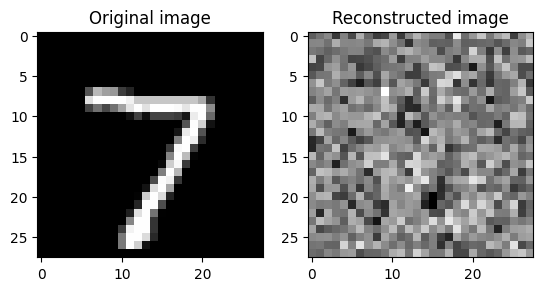

In [ ]:
preds = model.predict(X_test)
plot_reconstruction(X_test[0], preds[0])

Auto-encoders are known to be good image denoisers, if trained using noisy images as inputs and clean ones as outputs.

**Question 4.** Using the below-defined noisy copies of `X_train` and `X_test`, check the denoising 
capabilities of a network with the same structure as in the previous question.

In [5]:
import numpy as np

X_train_noisy = X_train + .1 * np.random.randn(*X_train.shape)
X_test_noisy = X_test + .1 * np.random.randn(*X_test.shape)

Epoch 1/20
  9/235 [>.............................] - ETA: 1s - loss: 0.1161 

2023-12-15 16:39:07.897623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 2s 6ms/step - loss: 0.0568
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0442
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0564
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0999
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1594
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2624
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.2877
Epoch 8/20
235/235 [==============================] - 1s 6ms/step - loss: 0.4079
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.3350
Epoch 10/20
235/235 [==============================] - 1s 5ms/step - loss: 0.5179
Epoch 11/20
235/235 [==============================] - 1s 5ms/step - loss: 0.8394
Epoch 12/20
235/235 [==============================] - 1s 6ms/step - loss: 0.7216
Epoch 13/20
235/235 [===============

In [ ]:
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], )),
    Dense(units=64, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=16, activation="relu"),
    Dense(units=32, activation="relu"),
    Dense(units=64, activation="relu"),
    Dense(units=X_train.shape[1])
])
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_noisy, X_train, epochs=20, batch_size=128)

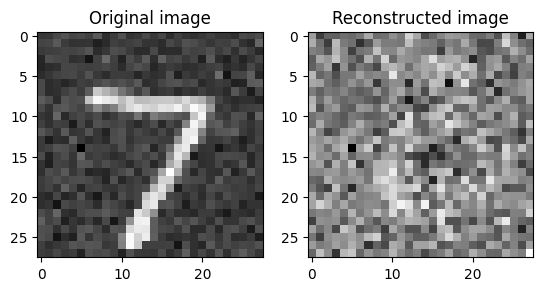

In [ ]:
preds = model.predict(X_test_noisy)
plot_reconstruction(X_test_noisy[0], preds[0])

## Generative Adversarial Networks (GAN)

In this section, you will be invited to play with two types of GAN models to generate MNIST-like data.

First, you will find below an almost complete implementation of the original GAN model (widely inspired from <https://github.com/eriklindernoren/Keras-GAN>).

**Question 5.** Fill in the blanks (TODO marks in the `train` method) to complete the code and train a model on MNIST for 1000 epochs.

In [ ]:
from keras.datasets import mnist
from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization, LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import Adam

import numpy as np

class GAN():
    def __init__(self):
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = 100

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=Adam(0.0002, 0.5),
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise as input and generates imgs
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated images as input and determines validity
        validity = self.discriminator(img)

        # The combined model  (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, validity)
        self.combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))


    def build_generator(self):

        model = Sequential()

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        img = model(noise)

        return Model(noise, img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Flatten())
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        validity = model(img)

        return Model(img, validity)

    def train(self, epochs, batch_size=128):

        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()

        # Rescale -1 to 1
        X_train = X_train / 127.5 - 1.
        X_train = np.expand_dims(X_train, axis=3)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]

            noise = np.random.randn(batch_size, self.latent_dim)
            
            # Generate a batch of new images
            gen_imgs = self.generator.predict(noise, verbose=0)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)  # TODO: change None to a reasonable value
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)  # TODO: change None to a reasonable value
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            noise = np.random.randn(batch_size, self.latent_dim)  # TODO: change None to a reasonable value

            # Train the generator (to have the discriminator label samples as valid)
            g_loss = self.combined.train_on_batch(noise, valid)  # TODO: change None to a reasonable value

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0]))

gan = GAN()
gan.train(epochs=10 * 1000)


2023-12-15 16:39:34.882745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 3ms/step


2023-12-15 16:39:35.252370: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-15 16:39:36.657422: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0 [D loss: 0.677415, acc.: 56.64%] [G loss: 0.600940]
4/4 [==============================] - 0s 3ms/step
1 [D loss: 0.372360, acc.: 76.17%] [G loss: 0.626664]
4/4 [==============================] - 0s 2ms/step
2 [D loss: 0.352827, acc.: 78.91%] [G loss: 0.627331]
4/4 [==============================] - 0s 2ms/step
3 [D loss: 0.351525, acc.: 77.34%] [G loss: 0.678765]
4/4 [==============================] - 0s 2ms/step
4 [D loss: 0.342894, acc.: 79.30%] [G loss: 0.789475]
4/4 [==============================] - 0s 2ms/step
5 [D loss: 0.318809, acc.: 83.20%] [G loss: 0.853271]
4/4 [==============================] - 0s 2ms/step
6 [D loss: 0.289607, acc.: 91.41%] [G loss: 1.042876]
4/4 [==============================] - 0s 2ms/step
7 [D loss: 0.259080, acc.: 96.88%] [G loss: 1.142200]
4/4 [==============================] - 0s 2ms/step
8 [D loss: 0.213298, acc.: 99.61%] [G loss: 1.290334]
4/4 [==============================] - 0s 2ms/step
9 [D loss: 0.188434, acc.: 99.22%] [G loss: 1.467086]
4

Now that your model is trained, generate a few images and visualize them with the code below:

2023-12-15 16:51:09.232568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 433ms/step


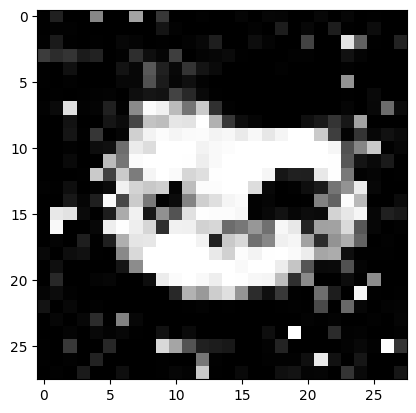

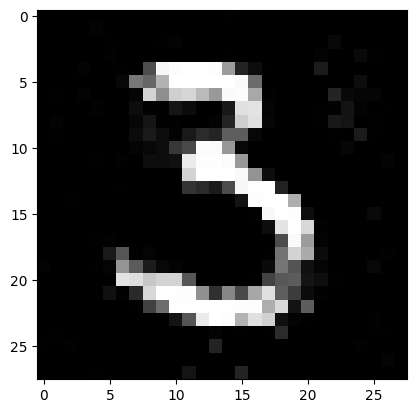

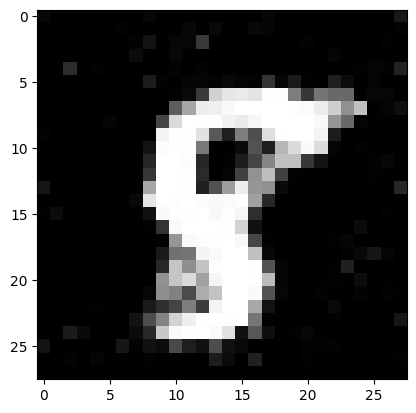

In [ ]:
import matplotlib.pyplot as plt

n_images = 3
z = np.random.randn(n_images, gan.latent_dim)  # TODO: change None to a reasonable value
gen_imgs = gan.generator.predict(z)

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
for i in range(n_images):
  plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
  plt.show()

Code for a Conditional GAN is quite similar (_cf._ below, once again widely inspired from the same GitHub repository).

**Question 6.** What is the input fed to the generator to generate a fake sample?

In [ ]:
from keras.layers import Multiply, Embedding


class CGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 28
        self.img_cols = 28
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.num_classes = 10
        self.latent_dim = 100

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss=['binary_crossentropy'],
            optimizer=Adam(0.0002, 0.5),
            metrics=['accuracy'])

        # Build the generator
        self.generator = self.build_generator()

        # The generator takes noise and the target label as input
        # and generates the corresponding digit of that label
        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,))
        img = self.generator([noise, label])

        # For the combined model we will only train the generator
        self.discriminator.trainable = False

        # The discriminator takes generated image as input and determines validity
        # and the label of that image
        valid = self.discriminator([img, label])

        # The combined model  (stacked generator and discriminator)
        # Trains generator to fool discriminator
        self.combined = Model([noise, label], valid)
        self.combined.compile(loss=['binary_crossentropy'],
            optimizer=Adam(0.0002, 0.5))

    def build_generator(self):

        model = Sequential()

        model.add(Dense(256))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Dense(np.prod(self.img_shape), activation='tanh'))
        model.add(Reshape(self.img_shape))

        noise = Input(shape=(self.latent_dim,))
        label = Input(shape=(1,), dtype='int32')
        label_embedding = Flatten()(Embedding(self.num_classes, self.latent_dim)(label))

        model_input = Multiply()([noise, label_embedding])
        img = model(model_input)

        return Model([noise, label], img)

    def build_discriminator(self):

        model = Sequential()

        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=self.img_shape)
        label = Input(shape=(1,), dtype='int32')

        label_embedding = Flatten()(Embedding(self.num_classes, np.prod(self.img_shape))(label))
        flat_img = Flatten()(img)

        model_input = Multiply()([flat_img, label_embedding])

        validity = model(model_input)

        return Model([img, label], validity)

    def train(self, epochs, batch_size=128):

        # Load the dataset
        (X_train, y_train), (_, _) = mnist.load_data()

        # Configure input
        X_train = (X_train.astype(np.float32) - 127.5) / 127.5
        X_train = np.expand_dims(X_train, axis=3)
        y_train = y_train.reshape(-1, 1)

        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))

        for epoch in range(epochs):

            # ---------------------
            #  Train Discriminator
            # ---------------------

            # Select a random half batch of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs, labels = X_train[idx], y_train[idx]

            # Sample noise as generator input
            noise = np.random.normal(0, 1, (batch_size, 100))

            # Generate a half batch of new images
            gen_imgs = self.generator.predict([noise, labels], verbose=0)

            # Train the discriminator
            d_loss_real = self.discriminator.train_on_batch([imgs, labels], valid)
            d_loss_fake = self.discriminator.train_on_batch([gen_imgs, labels], fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

            # ---------------------
            #  Train Generator
            # ---------------------

            # Condition on labels
            sampled_labels = np.random.randint(0, 10, batch_size).reshape(-1, 1)

            # Train the generator
            g_loss = self.combined.train_on_batch([noise, sampled_labels], valid)

            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss[0]))
            
cgan = CGAN()
cgan.train(epochs=1000)

2023-12-15 16:51:10.125677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 7ms/step


2023-12-15 16:51:10.453654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-15 16:51:11.377615: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


0 [D loss: 0.693997, acc.: 29.69%] [G loss: 0.681016]
4/4 [==============================] - 0s 3ms/step
1 [D loss: 0.682928, acc.: 49.22%] [G loss: 0.672432]
4/4 [==============================] - 0s 2ms/step
2 [D loss: 0.674914, acc.: 50.00%] [G loss: 0.664647]
4/4 [==============================] - 0s 3ms/step
3 [D loss: 0.665388, acc.: 50.00%] [G loss: 0.654558]
4/4 [==============================] - 0s 2ms/step
4 [D loss: 0.656515, acc.: 50.00%] [G loss: 0.646277]
4/4 [==============================] - 0s 3ms/step
5 [D loss: 0.645113, acc.: 50.00%] [G loss: 0.637969]
4/4 [==============================] - 0s 2ms/step
6 [D loss: 0.630783, acc.: 50.00%] [G loss: 0.627096]
4/4 [==============================] - 0s 2ms/step
7 [D loss: 0.612572, acc.: 50.00%] [G loss: 0.617096]
4/4 [==============================] - 0s 2ms/step
8 [D loss: 0.594618, acc.: 50.00%] [G loss: 0.606031]
4/4 [==============================] - 0s 2ms/step
9 [D loss: 0.570561, acc.: 50.00%] [G loss: 0.594995]
4

**Question 7.** Fit the model for 1000 epochs and, once fitted, generate a few fake "8" handwritten digits (take inspiration from the code above to show the generated images).

1/1 [==============================] - 0s 143ms/step


2023-12-15 16:52:31.210344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


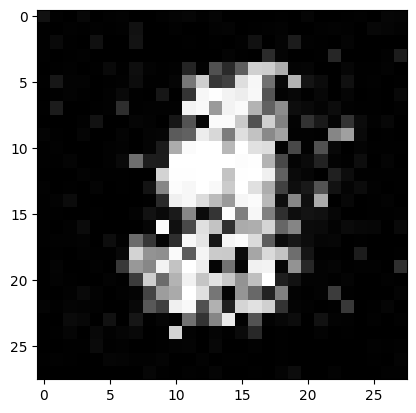

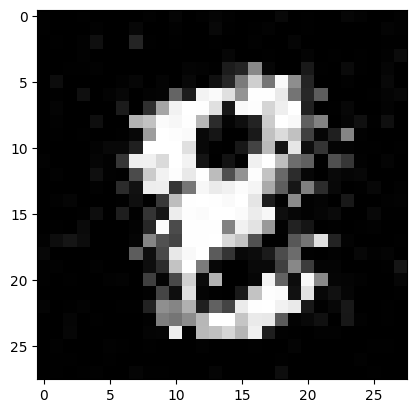

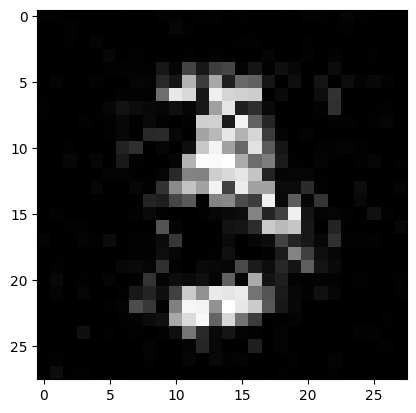

In [ ]:
from keras.utils import to_categorical
n_images = 3
z = np.random.randn(n_images, cgan.latent_dim)  # TODO: change None to a reasonable value
labels = np.array([8, 8, 8])
gen_imgs = cgan.generator.predict([z, labels])

# Rescale images 0 - 1
gen_imgs = 0.5 * gen_imgs + 0.5
for i in range(n_images):
  plt.imshow(gen_imgs[i, :, :, 0], cmap='gray')
  plt.show()

## Diffusion models

For this section on Diffusion models, we will not try to implement diffusion models ourselves but rather rely on pre-trained models stored on HuggingFace.
To do so, we will use the `diffusers` library provided by HuggingFace, which we first need to install:


In [11]:
!pip install diffusers

The following code allows to load a pre-trained model hosted at HuggingFace and use it to generate images.
HuggingFace-hosted models can be found at: <https://huggingface.co/models>

**Question 8.** Use two different models (trained on different training sets) and ask for the generation of 4 different images. Observe the impact of the training set on generated images.

unet/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

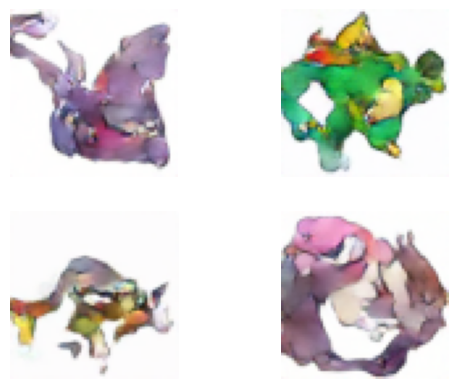

In [13]:
from diffusers import DDPMPipeline
import matplotlib.pyplot as plt

def gen_images(model_id, n_images, n_steps=1000):
  # load model and scheduler
  pipe = DDPMPipeline.from_pretrained(model_id)
  # pipe.to("cuda")

  # run pipeline in inference (sample random noise and denoise)
  return pipe(batch_size=n_images, num_inference_steps=n_steps).images

images = gen_images("mrm8488/ddpm-ema-pokemon-64", n_images=4)
for i in range(4):
  plt.subplot(2, 2, i + 1)
  plt.imshow(images[i])
  plt.axis("off");

In [ ]:
# images = gen_images("google/ddpm-cat-256", n_images=4)
# for i in range(4):
#   plt.subplot(2, 2, i + 1)
#   plt.imshow(images[i])
#   plt.axis("off");

Stable Diffusion is a diffusion model that allows one to generate images from a text prompt. 
The idea behind Stable Diffusion is that the diffusion process at each step is conditioned by a high-dimensional representation of the text prompt, forcing the model to generate images that are related to the said prompt.

**Question 9.** Use Stable Diffusion v1-5 available [there](https://huggingface.co/runwayml/stable-diffusion-v1-5) to generate an image from a text of your choice.

In [15]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 1.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 1.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 767.6 kB/s eta 0:00:0000:0100:01


In [14]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")

prompt = "a photo of a computer science teacher surfing a gigantic wave"
image = pipe(prompt).images[0]
image

ImportError: 
StableDiffusionPipeline requires the transformers library but it was not found in your environment. You can install it with pip: `pip
install transformers`
